<a href="https://colab.research.google.com/github/2005leo/2005leo/blob/main/ProjectBikeRentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('day.csv')
print(data.head())  # View first 5 rows

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


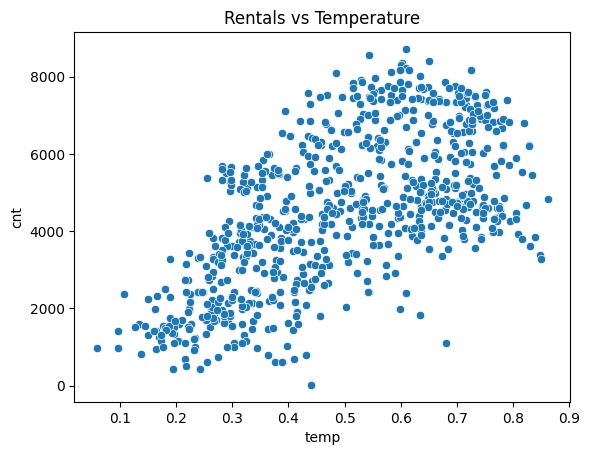

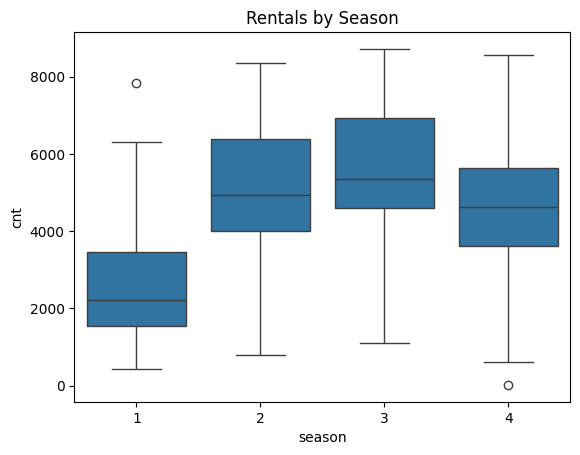

In [ ]:
# Plot rentals vs temperature
sns.scatterplot(x='temp', y='cnt', data=data)
plt.title('Rentals vs Temperature')
plt.show()

# Plot rentals by season
sns.boxplot(x='season', y='cnt', data=data)
plt.title('Rentals by Season')
plt.show()

In [ ]:
# Convert season and weathersit to categorical
data = pd.get_dummies(data, columns=['season', 'weathersit'], drop_first=True)

# Drop unnecessary columns (date, casual, registered)
data = data.drop(['dteday', 'casual', 'registered'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('cnt', axis=1)
y = data['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, predictions)}')
print(f'R² Score: {r2_score(y_test, predictions)}')

MAE: 597.0651440243029
R² Score: 0.8402277336460527


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, predictions)}')
print(f'R² Score: {r2_score(y_test, predictions)}')

MAE: 448.8925850340136
R² Score: 0.8756877105686035


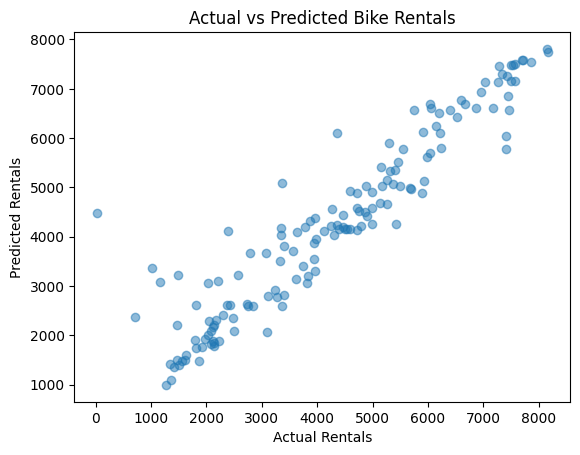

In [ ]:
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')
plt.title('Actual vs Predicted Bike Rentals')
plt.show()